# Imports

In [2]:
from importlib import reload
import functions as f

# for data handling
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [3]:
import json
import lichess.api
import sklearn
import os

In [4]:
# General

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Ridge(alpha=a, normalize=True)
from sklearn.linear_model import Lasso
# Lasso(alpha = alpha[i], normalize=True, max_iter = 1000000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
# Classification

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier(max_depth = 3)
# fig = tree_clf.fit(X, y)
# tree.plot_tree(fig,filled = True)
# plt.show()
# tree_clf.predict_proba(X)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.svm import LinearSVC # LinearSVC(C=1, loss="hinge")
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X,y)

In [7]:
# Unsupervised learning

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.explained_variance_ratio_
# plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')

from sklearn.manifold import MDS
# mds = MDS(n_components = 2)
# X_mds = mds.fit_transform(X)

from sklearn.manifold import LocallyLinearEmbedding
# lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
# X_lle = lle.fit_transform(X)

from sklearn.manifold import Isomap
# iso = Isomap(n_neighbors=160, n_components=2)
# X_iso = iso.fit_transform(X)

from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, perplexity=50)
# X_tsne = tsne.fit_transform(X)

In [8]:
# For reloading our functions library if anything is changed
f = reload(f)

# Data

## Downloading

In [4]:
leaders = ['Konevlad']

# Type of games'
game_type = 'blitz'

# How many games to read for each of them
num_games = 10

def get_white_dicts(player_name, num_games, time_type, format_):
    games_raw = lichess.api.user_games(player_name, max=num_games, perfType=time_type, color = 'white', format = format_)
    games_list = games_raw.split('\n\n\n')
    return [f.get_gameDict(game) for game in games_list]

for player in leaders:
    features = []
    #print(player)
    for game_dict in get_white_dicts(player,num_games, game_type, f.SINGLE_PGN):
        if game_dict['middle_game_index']:
            game_feat = f.get_features(game_dict)
            features.append(game_feat)
    df = pd.DataFrame(features)
    #df.to_csv('data\\'+str(player) +'.csv')

Konevlad


In [5]:
df.head()

,game_id,white_player,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
0,https://lichess.org/LmQkwkmj,Konevlad,0,0.0,0.105048,1.925000,0,0,0,2.612500,...,6,0,3,0,1.0,0.428571,0.600000,0,0,3.373171
1,https://lichess.org/ju4FOVuH,Konevlad,0,0.0,0.015639,2.581395,0,0,0,2.267442,...,4,1,1,0,1.0,0.678571,0.465116,1,35,3.303955
2,https://lichess.org/YLk7fhUj,Konevlad,0,0.0,0.000000,3.000000,0,0,0,3.285714,...,2,0,0,0,1.0,0.769231,0.000000,0,0,3.570568
3,https://lichess.org/af26EyQM,Konevlad,0,0.0,0.000000,0.000000,1,0,0,3.625000,...,2,0,0,0,1.5,0.636364,0.050000,0,0,3.318655
4,https://lichess.org/5hBUqkfe,Konevlad,0,0.0,0.140363,2.379310,0,0,0,2.000000,...,6,1,1,0,1.0,0.148148,0.344828,2,54,3.176171


## 100 Blitz players import

In [13]:
my_path = os.path.realpath('')
folder = os.path.join(my_path, 'data')
files = os.listdir(folder)

print(files)

['Sigma_Tauri.csv', 'Evgeny_Levin.csv', 'A_Kukhmazov.csv', 'E-Shaposhnikov.csv', 'GeorgMeier.csv', 'epistimonas.csv', 'Last7Samurai.csv', 'ElAsesinoFavorito.csv', 'Brrrrrrrr.csv', 'gsvc.csv', 'VerdeNotte.csv', 'PUKLO.csv', 'Chepursias.csv', 'Alexander_Donchenko.csv', 'Chesser22.csv', 'IGMGataKamsky.csv', 'BabaRamdev.csv', 'Tayka.csv', 'Hunni-7.csv', 'LazaroBruzon.csv', 'Liem_Chess.csv', 'Stratersest.csv', 'jsl.csv', 'Kelevra317.csv', 'jitanu76.csv', 'Ernst_Gruenfeld.csv', 'AdriD.csv', 'Yarebore.csv', 'Farrukh78.csv', 'Dynamo37.csv', 'MELND-777.csv', 'Tryhard00.csv', 'NathyGonzalez.csv', 'RD4ever.csv', 'Kiborg1987.csv', 'Konevlad.csv', 'Buhmann.csv', 'Inventing_Invention.csv', 'Grandelicious.csv', 'Federicov93.csv', 'arturchix.csv', 'darkghoul.csv', 'OpeningGeek.csv', 'recapture.csv', 'Drvitman.csv', 'pozvonochek.csv', 'mutdpro.csv', 'S2Pac.csv', 'muisback.csv', 'KasparovModeOn.csv', 'AbasovN.csv', 'Shant7777777.csv', 'dalmatinac101.csv', 'Wolverines1.csv', 'Abik02.csv', 'backrankissues

In [14]:
# for windows use
#dfs = [pd.read_csv(folder+'\\'+file) for file in files]

# for linux use
dfs = [pd.read_csv(folder +'/'+file) for file in files]

In [15]:
len(dfs)

100

In [16]:
for i in range(len(dfs)):
    df = dfs[i]
    if df['white_player'].at[0] == 'Konevlad':
        print(i)

35


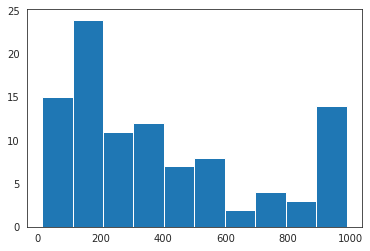

In [17]:
lengths = [len(df) for df in dfs]
plt.hist(lengths)
plt.show()

In [18]:
dfs_copy = [df.copy() for df in dfs]

# Analysis

## 14 players

In [19]:
long_dfs = [df for df in dfs_copy if len(df) >= 900]
len(long_dfs)

14

In [20]:
df = pd.concat(long_dfs)

# There was some (like 100 games) NaN data...
df_copy = df.copy().dropna()
X = df_copy.drop(columns = ['game_id','white_player'])
y = df_copy['white_player']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

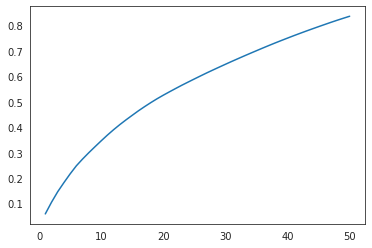

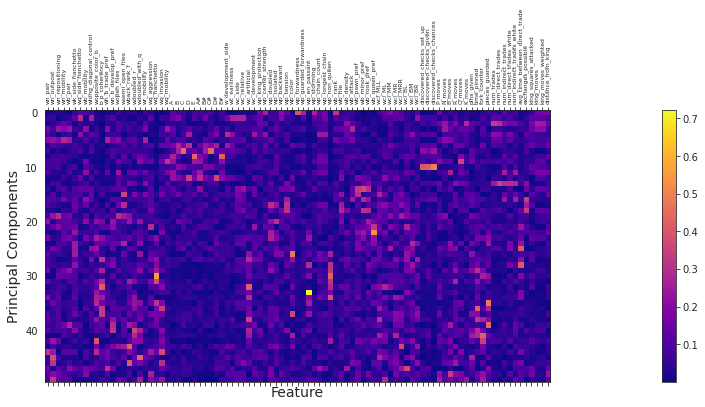

In [26]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('pca', PCA(n_components = 50))
                ])
pipe.fit(X_train)

# Explained variance ratio
Vars = pipe['pca'].explained_variance_ratio_
plt.plot(np.arange(1,len(Vars)+1), np.cumsum(Vars))
plt.show()


# Plot the absolute value of the PCA components (to see what is near zero and what isn't)
fig, ax = plt.subplots(figsize=(40, 5))

im = ax.matshow(np.abs(pipe['pca'].components_), cmap = 'plasma')
fig.colorbar(im)

plt.sca(ax)
features = X.columns
plt.xticks(range(len(features)),features, rotation = 90, fontsize = 6)
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("Principal Components", fontsize = 14)

plt.show()

In [28]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('svc', SVC(kernel = "rbf", C=1))
                ])
pipe.fit(X_train,y_train)

pred = pipe.predict(X_test)
sum(pred==y_test)/len(y_test)

0.3725734196117471

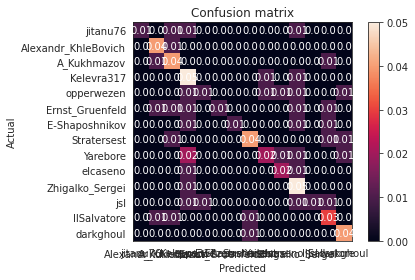

In [29]:
guesses = pred
actual = y_test

labels = list(set(y_test.values))

c_matrix = np.round(sklearn.metrics.confusion_matrix(actual,guesses,labels = labels) / len(y_test),2)

fig, ax = plt.subplots()
im = ax.imshow(c_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

fig.colorbar(im)
        
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

## Non-Pro Analysis

In [45]:
## Read in the data
df = pd.read_csv('rook_kyle.csv')

In [31]:
for i in range(len(df)):
    if (df['white_player'][i] != "rook1021") and (df['white_player'][i] != "bindercommakyle"):
        df['white_player'][i] = "other"

## Make a dataframe with no "other", and one hot the player categorical variable.

no_other = df.loc[df['white_player'] != 'other']
one_zero_no_other = no_other.replace('bindercommakyle', 1).replace('rook1021', 0)

/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
## Perform the train-test split

X = one_zero_no_other.drop(columns = ['white_player', 'game_id'])

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, one_zero_no_other['white_player'], test_size = 0.2, stratify = one_zero_no_other['white_player'])

In [33]:
## Scale the data by the training sample:

scaler = StandardScaler()
scaler.fit(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)
X_train = scaler.transform(X_train_unscaled)

In [34]:
## A simple logistic regression model:

log_reg = LogisticRegression()
fit = log_reg.fit(X_train, y_train)

In [35]:
## Yields 90% accuracy!

sum(fit.predict(X_test) == y_test)/len(y_test)

0.8848167539267016

### PCA

In [36]:
## We run the PCA
pca = PCA(n_components = 20)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

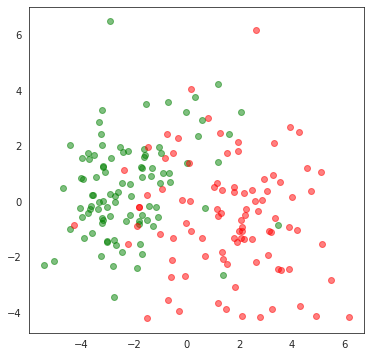

In [37]:
## Plotting the first two principal components
# We see that the first component captures most of the information that differentiates these players

plt.figure(figsize = (6,6))
def plot_by_white_player(X,y):
    for i in range(len(X)):
        if (y.iloc[i] == 1):
            color = 'red'
            plt.scatter(X[i][0], X[i][1], c = color, alpha = 0.5)
        elif (y.iloc[i] == 0):
            color = 'green'
            plt.scatter(X[i][0], X[i][1], c = color, alpha = 0.5)

plot_by_white_player(X_test_pca, y_test)
plt.show()

In [38]:
pca.components_.shape

(20, 92)

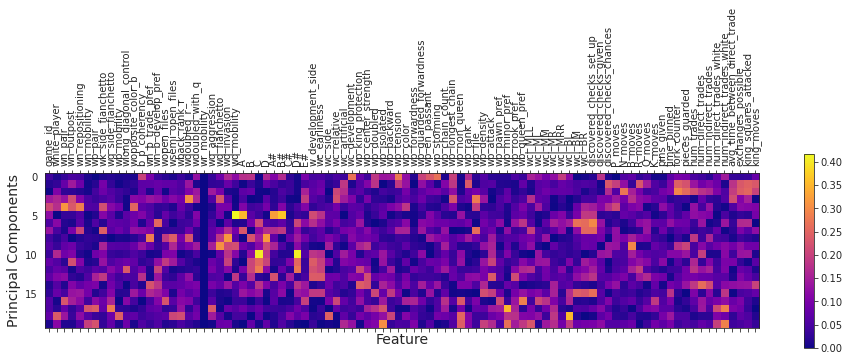

In [39]:
# We can visualize with a heatmap

abs_pca_components = [abs(component) for component in pca.components_]

sns.set_style("white")
plt.matshow(abs_pca_components, cmap = 'plasma')


plt.colorbar()

plt.xticks(range(92),
          [df.columns[i] for i in range(0,92)], rotation = 90, 
          fontsize = 10)

plt.xlabel("Feature", fontsize = 14)
plt.ylabel("Principal Components", fontsize = 14)

plt.show()

In [40]:
## Just grab the first component:

pca = PCA(n_components = 1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [41]:
## And we still get rather good accuracy.

log_reg_pca = LogisticRegression()
log_reg_pca_fit = log_reg_pca.fit(X_train_pca, y_train)

sum(log_reg_pca_fit.predict(X_test_pca) == y_test) / len(y_test)

0.8219895287958116

## Predicting opponents and Konevlad

In [51]:
players =['Konevlad', 'Liem_Chess', 'HansSchmidt', 'Zhigalko_Sergei', 'PUKLO', 'Benefactorr', 'MikeGScarn','E-Shaposhnikov','Arnelos', 'EnglishLongbow', 'Dacii', 'K-Georgiev', 'vistagausta', 'may6enexttime', 'grizzlybear79', 'LazaroBruzon', 'BabaRamdev', 'ChermanTrawz', 'bushidonaruto', 'Bestinblitz', 'opperwezen', 'NathyGonzalez', 'Ernst_Gruenfeld', 'Federicov93', 'Chesser22', 'Brrrrrrrr', 'Hunni-7', 'IGMGataKamsky','Eduiturri','arturchix','NIndja64','Polyclinical', 'elcaseno', 'gsvc', 'pozvonochek', 'epistimonas', 'dalmatinac101', 'Samson_Ofubu', 'Sigma_Tauri', 'CrazySage', 'ultraking1', 'Tryhard00', 'RD4ever', 'Rakhmanov_Aleksandr', 'OpeningGeek', 'Drvitman', 'jsl', 'Last7Samurai', 'KasparovModeOn', 'MELND-777', 'S2Pac', 'Evgeny_Levin', 'Chepursias', 'Feokl1995', 'Kiborg1987', 'Yarebore', 'mutdpro', 'Arteler', 'sillyMASTER', 'recapture', 'A_Kukhmazov', 'Tayka', 'jitanu76', 'Abik02', 'GMVallejo', 'ChessWeeb', 'Stratersest', 'Grandelicious', 'DrunkGatineau', 'BartoszSocko', 'Inventing_Invention', 'KIBORG799', 'dmitrij_IM', 'AdriD', 'backrankissues', 'IVK88', 'justantan', 'GrazyHunter', 'Wolverines1', 'Shant7777777', 'Farrukh78', 'Nima_Junior', 'federovski', 'AbasovN', 'Dynamo37', 'VerdeNotte', 'CaptainJames25', 'Alexander_Donchenko', 'ElAsesinoFavorito', 'Brigello', 'GaMbit9285', 'darkghoul', 'Buhmann', 'Kelevra317', 'Amin_____tb', 'muisback', 'Alexandr_KhleBovich', 'lenochka18', 'GeorgMeier', 'IlSalvatore']

df = pd.read_csv('data/Konevlad.csv')

for i in range(1, len(players)):
    df_temp = pd.read_csv('data/' + str(players[i]) + '.csv')
    df = pd.concat([df, df_temp])
    
players_count = df.white_player.value_counts()

players_critical = []
for player in players:
    if players_count[player] >= 250:
        players_critical.append(player)

In [52]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True)

svc = SVC(kernel = 'rbf')
scaler = StandardScaler()
pca = PCA(n_components = 50)

results =[[1,1]for i in range(0,len(players_critical)-1)]

In [63]:
#for linux
df_Konevlad = pd.read_csv('data/Konevlad.csv')

for i in range(1, len(players_critical)):
    avg_precision = 0
    avg_recall = 0
    
    # read in data from each player
    # for linux
    df_other = pd.read_csv('data/' + str(players_critical[i]) + '.csv')
    df_other = df_other.dropna()
    
    #df_other = df_other[:266]
    df = pd.concat([df_Konevlad, df_other])

    names= df['white_player']

    df = df.drop(columns = ['game_id', 'white_player'])

    opening = df[['A', 'B', 'C', 'D', 'E', 'A#', 'B#', 'C#', 'D#', 'E#']]

    opening_numpy = opening.to_numpy()

    df = df.drop(columns = ['A', 'B', 'C', 'D', 'E', 'A#', 'B#', 'C#', 'D#', 'E#'])

    y = names.to_numpy()
    X = df.to_numpy()

    ## creates the stratified kfold 
    for train_index, test_index in kfold.split(X,y):
        X_train = X[train_index]
        opening_train = opening_numpy[train_index]
        opening_test = opening_numpy[test_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        # run the dataframe through standard scaler
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # adds the opening data
        X_train_scaled_opening = np.append(X_train_scaled, opening_train, axis = 1)
        X_test_scaled_opening = np.append(X_test_scaled, opening_test, axis  =1)

        # runs the svc model
        svc.fit(X_train_scaled_opening, y_train)
        pred = svc.predict(X_test_scaled_opening)

        # calculates the precision and recall
        matrix = sklearn.metrics.confusion_matrix(y_test, pred)
        
        precision = matrix[0][0]/ (matrix[0][0] + matrix[0][1]) 
        recall = matrix[0][0] /(matrix[0][0] + matrix[1][0])
        
        avg_precision += precision
        avg_recall += recall

    results[i-1][0] = avg_precision/10
    results[i-1][1] = avg_recall/10

/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: in

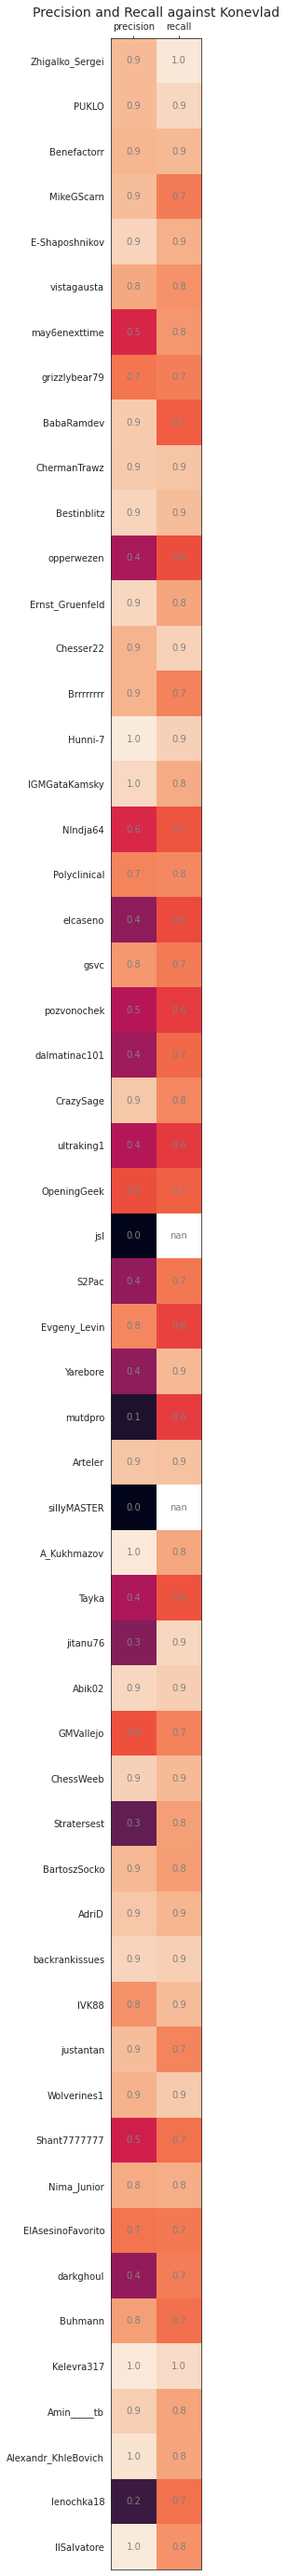

In [64]:

fig,ax = plt.subplots(figsize = (7,50))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

ax.imshow(results)
ax.set_yticks(np.arange(len(players_critical)-1))
ax.set_xticks(np.arange(2))


ax.set_yticklabels(players_critical[1:])
ax.set_xticklabels(['precision', 'recall'])

for i in range(0,2):
    for j in range(0,len(players_critical)-1):
        text = ax.text(i, j, np.round(results[j][i],1), horizontalalignment="center", verticalalignment="center", color="gray" )

text = ax.set_title("Precision and Recall against Konevlad", fontsize = 14)